# Métodos de optimización

Hasta ahora, siempre has utilizado el Descenso Gradiente para actualizar los parámetros y minimizar el coste. En este cuaderno, adquirirás habilidades con algunos métodos de optimización más avanzados que pueden acelerar el aprendizaje y quizás incluso conseguir un mejor valor final para la función de coste. Tener un buen algoritmo de optimización puede ser la diferencia entre esperar días o sólo unas horas para obtener un buen resultado. 

Al final de este cuaderno, usted será capaz de: 

* Aplicar métodos de optimización como el Gradient Descent (estocástico), Momentum, RMSProp y Adam
* Utilizar minibatches aleatorios para acelerar la convergencia y mejorar la optimización

El descenso de gradiente va "cuesta abajo" en una función de coste $J$. Piense que trata de hacer lo siguiente 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> <b>Figure 1</b> </u>: <b>Minimizar el coste es como encontrar el punto más bajo en un paisaje accidentado</b><br> En cada paso del entrenamiento, se actualizan los parámetros siguiendo una determinada dirección para intentar llegar al punto más bajo posible. </center></caption>


**Notaciones**: Como siempre, $\frac{{parcial J}{parcial a } = $ `da` para cualquier variable `a`.

¡Empecemos!

## Table of Contents
- [1- Packages](#1)
- [2 - Gradient Descent](#2)
    - [Exercise 1 - update_parameters_with_gd](#ex-1)
- [3 - Mini-Batch Gradient Descent](#3)
    - [Exercise 2 - random_mini_batches](#ex-2)
- [4 - Momentum](#4)
    - [Exercise 3 - initialize_velocity](#ex-3)
    - [Exercise 4 - update_parameters_with_momentum](#ex-4)
- [5 - Adam](#5)
    - [Exercise 5 - initialize_adam](#ex-5)
    - [Exercise 6 - update_parameters_with_adam](#ex-6)
- [6 - Model with different Optimization algorithms](#6)
    - [6.1 - Mini-Batch Gradient Descent](#6-1)
    - [6.2 - Mini-Batch Gradient Descent with Momentum](#6-2)
    - [6.3 - Mini-Batch with Adam](#6-3)
    - [6.4 - Summary](#6-4)
- [7 - Learning Rate Decay and Scheduling](#7)
    - [7.1 - Decay on every iteration](#7-1)
        - [Exercise 7 - update_lr](#ex-7)
    - [7.2 - Fixed Interval Scheduling](#7-2)
        - [Exercise 8 - schedule_lr_decay](#ex-8)
    - [7.3 - Using Learning Rate Decay for each Optimization Method](#7-3)
        - [7.3.1 - Gradient Descent with Learning Rate Decay](#7-3-1)
        - [7.3.2 - Gradient Descent with Momentum and Learning Rate Decay](#7-3-2)
        - [7.3.3 - Adam with Learning Rate Decay](#7-3-3)
    - [7.4 - Achieving similar performance with different methods](#7-4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from copy import deepcopy
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Descenso de gradiente

Un método de optimización simple en el aprendizaje automático es el descenso de gradiente (GD). Cuando se toman pasos de gradiente con respecto a todos los $m$ ejemplos en cada paso, también se llama Batch Gradient Descent.

<a name='ex-1'></a>
### Ejercicio 1 - actualizar_parámetros_con_gd

Implementar la regla de actualización de descenso de gradiente. La regla de descenso de gradiente es, para $l = 1, ..., L$: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

donde L es el número de capas y $\alpha$ es la tasa de aprendizaje. Todos los parámetros deben ser almacenados en el diccionario `parameters`. Tenga en cuenta que el iterador `l` comienza en 1 en el bucle `for` ya que los primeros parámetros son $W^{[1]}$ y $b^{[1]}$.

<details><summary>Code</summary>

```python    
    parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads['dW' + str(l)]
    parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads['db' + str(l)]
```

In [2]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Actualizar los parámetros utilizando un paso de descenso de gradiente
    
    Argumentos:
    parameters -- diccionario python que contiene los parámetros a actualizar:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- diccionario de python que contiene sus gradientes para actualizar cada uno de los parámetros:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- la tasa de aprendizaje, escalar.
    
    Devuelve:
    parameters -- diccionario python que contiene sus parámetros actualizados 
    """
    L = len(parameters) // 2 # numeros de capas

    # actualizar parametros
    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads['dW' + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads['db' + str(l)]
        
    return parameters

In [3]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
learning_rate = 0.01
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

update_parameters_with_gd_test(update_parameters_with_gd)

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]
All test passed


Una variante de esto es el Descenso Gradiente Estocástico (SGD), que es equivalente al descenso gradiente en mini lotes, donde cada mini lote tiene sólo 1 ejemplo. La regla de actualización que acaba de implementar no cambia. Lo que cambia es que usted calcularía los gradientes en un solo ejemplo de entrenamiento a la vez, en lugar de en todo el conjunto de entrenamiento. Los siguientes ejemplos de código ilustran la diferencia entre el descenso de gradiente estocástico y el descenso de gradiente (por lotes). 

- Descenso de gradiente (por lotes)**:

``` python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, caches, parameters)
    # Update parameters
    parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    cost_total = 0
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost_total += compute_cost(a, Y[:,j])  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters
        parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
```

En el Descenso Gradiente Estocástico, sólo se utiliza un ejemplo de entrenamiento antes de actualizar los gradientes. Cuando el conjunto de entrenamiento es grande, el SGD puede ser más rápido. Pero los parámetros "oscilarán" hacia el mínimo en lugar de converger suavemente. Esto es lo que parece: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='pink'> <b>Figure 1</b> : <b>SGD vs GD</b><br> "+" denota un mínimo del coste. SGD conduce a muchas oscilaciones para alcanzar la convergencia, pero cada paso es mucho más rápido de calcular para SGD que para GD, ya que utiliza sólo un ejemplo de entrenamiento (frente a todo el lote para GD). </center></caption>
    
**Nótese** también que la implementación de SGD requiere 3 bucles for en total:
1. Sobre el número de iteraciones
2. Sobre los $m$ ejemplos de entrenamiento
3. Sobre las capas (para actualizar todos los parámetros, desde $(W^{[1]},b^{[1]})$ hasta $(W^{[L]},b^{[L]})$)

En la práctica, a menudo se obtienen resultados más rápidos si no se utiliza todo el conjunto de entrenamiento, o sólo un ejemplo de entrenamiento, para realizar cada actualización. El descenso de gradiente en mini lotes utiliza un número intermedio de ejemplos para cada paso. Con el descenso de gradiente en mini lotes, se realiza un bucle sobre los mini lotes en lugar de un bucle sobre los ejemplos de entrenamiento individuales.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='pink'> <b>Figure 2</b>   <b>SGD vs Mini-Batch GD</b><br> "+" denota un mínimo del coste. El uso de mini-lotes en su algoritmo de optimización a menudo conduce a una optimización más rápida. </center></caption>


<a name='3'></a>
## 3 - Mini-Lotes de Descenso de Gradientes

Ahora construirás algunos mini-lotes a partir del conjunto de entrenamiento (X, Y).

Hay dos pasos:
- **Shuffle** (Mezclar): Crear una versión mezclasda del conjunto de entrenamiento (X, Y) como se muestra a continuación. Cada columna de X e Y representa un ejemplo de entrenamiento. Obsérvese que el `Shuffle aleatorio` se realiza de forma sincrónica entre X e Y. De tal forma que, tras el mezclado , la columna $i^{th}$ de X es el ejemplo correspondiente a la etiqueta $i^{th}$ de Y. El paso de `Shuffle` garantiza que los ejemplos se dividirán aleatoriamente en diferentes minilotes. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partición**: Partición de la mezcla (X, Y) en mini-lotes de tamaño `mini_batch_size` (aquí 64). Tenga en cuenta que el número de ejemplos de entrenamiento no siempre es divisible por `mini_batch_size`. El último mini lote puede ser más pequeño, pero no hay que preocuparse por ello. Cuando el último mini lote es más pequeño que el `mini_batch_size`  completo, tendrá este aspecto: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

<a name='ex-2'></a>
### Ejercicio 2 - random_mini_batches

Implementa `random_mini_batches`. La parte de barajar ya ha sido codificada para ti. Para ayudarte con el paso de partición, se te ha proporcionado el siguiente código que selecciona los índices para los mini-lotes de $1^{st}$ y $2^{nd}$:

```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```
Tenga en cuenta que el último mini lote puede terminar siendo más pequeño que `mini_batch_size=64`. Dejemos que $\lfloor s \rfloor$ represente $s$ redondeado al entero más cercano (esto es `math.floor(s)` en Python). Si el número total de ejemplos no es un múltiplo de `mini_batch_size=64` entonces habrá $\left\lfloor \frac{m}{mini_batch_size}\right\rfloor$ mini-lotes con un total de 64 ejemplos, y el número de ejemplos en el minilote final será $\left(m-mini_\_batch_\_size \times \left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor\right)$.



**Sugerencia:**

$$ mini\_lote\_X = shuffled\_X[:, i : j]$$ 

Piensa en una forma de utilizar la variable del bucle for `k` para ayudarte a incrementar `i` y `j` en múltiplos de mini_batch_size.

Como ejemplo, si quieres incrementar en múltiplos de 3, podrías lo siguiente:

```python
n = 3
for k in (0 , 5):
    print(k * n)
```
<details><summary>Code</summary>

```python
for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:, k * inc : (k+1) * inc]
        mini_batch_Y = shuffled_Y[:, k * inc : (k+1) * inc]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
if m % mini_batch_size != 0:

    mini_batch_X = shuffled_X[:, num_complete_minibatches * inc:]
    mini_batch_Y = shuffled_Y[:, num_complete_minibatches * inc:]

    mini_batch = (mini_batch_X, mini_batch_Y)
    mini_batches.append(mini_batch)    
```  

In [8]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Crea una lista de minilotes aleatorios de (X, Y)
    
    Argumentos:
    X -- datos de entrada, de forma (tamaño de entrada, número de ejemplos)
    Y -- vector "etiqueta" verdadera (1 para el punto azul / 0 para el punto rojo), de forma (1, número de ejemplos)
    mini_tamaño_del_lote -- tamaño de los mini-lotes, entero
    
    Devuelve:
    mini_lotes -- lista de sincronizados (mini_lotes_X, mini_lotes_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Casos con un tamaño de mini lote completo, es decir, cada uno de 64 ejemplos.
    num_complete_minibatches = math.floor(m / mini_batch_size) 
    # número de minilotes de tamaño mini_lote en su partición
    for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:, k * inc : (k+1) * inc]
        mini_batch_Y = shuffled_Y[:, k * inc : (k+1) * inc]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Para tratar el caso final (último mini lote < tamaño de mini lote, es decir, menos de 64)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches * inc:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * inc:]
        
        # YOUR CODE ENDS HERE
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [9]:
np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)
n_batches = len(mini_batches)

assert n_batches == math.ceil(m / mini_batch_size), f"Wrong number of mini batches. {n_batches} != {math.ceil(m / mini_batch_size)}"
for k in range(n_batches - 1):
    assert mini_batches[k][0].shape == (nx, mini_batch_size), f"Wrong shape in {k} mini batch for X"
    assert mini_batches[k][1].shape == (1, mini_batch_size), f"Wrong shape in {k} mini batch for Y"
    assert np.sum(np.sum(mini_batches[k][0] - mini_batches[k][0][0], axis=0)) == ((nx * (nx - 1) / 2 ) * mini_batch_size), "Wrong values. It happens if the order of X rows(features) changes"
if ( m % mini_batch_size > 0):
    assert mini_batches[n_batches - 1][0].shape == (nx, m % mini_batch_size), f"Wrong shape in the last minibatch. {mini_batches[n_batches - 1][0].shape} != {(nx, m % mini_batch_size)}"

assert np.allclose(mini_batches[0][0][0][0:3], [294912,  86016, 454656]), "Wrong values. Check the indexes used to form the mini batches"
assert np.allclose(mini_batches[-1][0][-1][0:3], [1425407, 1769471, 897023]), "Wrong values. Check the indexes used to form the mini batches"

print("\033[92mAll test passed!")

All test passed!


In [ ]:
t_X, t_Y, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(t_X, t_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

random_mini_batches_test(random_mini_batches)

<font color='green'>
    
**Lo que debes recordar**:
- Barajar y Particionar son los dos pasos necesarios para construir minilotes
- A menudo se eligen potencias de dos para el tamaño del minilote, por ejemplo, 16, 32, 64, 128.

<a name='4'></a>
## 4 - Momentum

Dado que el descenso de gradiente por mini lotes realiza una actualización de los parámetros después de ver sólo un subconjunto de ejemplos, la dirección de la actualización tiene cierta varianza, por lo que el camino tomado por el descenso de gradiente por mini lotes "oscilará" hacia la convergencia. El uso del impulso puede reducir estas oscilaciones. 

El impulso tiene en cuenta los gradientes anteriores para suavizar la actualización. La "dirección" de los gradientes anteriores se almacena en la variable $v$. Formalmente, será la media ponderada exponencialmente del gradiente en los pasos anteriores. También se puede pensar en $v$ como la "velocidad" de una pelota rodando cuesta abajo, acumulando velocidad (e impulso) según la dirección del gradiente/pendiente de la colina. 

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='pink'><b>Figure 3</b> </u><font color='pink'>: Las flechas rojas muestran la dirección que toma un paso del descenso de gradiente por mini lotes con momentum. Los puntos azules muestran la dirección del gradiente (con respecto al mini lote actual) en cada paso. Más que seguir simplemente el gradiente, se permite que el gradiente influya en $v$ y luego dé un paso en la dirección de $v$.<br> <font color='black'> </center>

<a name='ex-3'></a>    
### Ejercicio 3 - inicializar_velocidad
Inicializar la velocidad. La velocidad, $v$, es un diccionario python que necesita ser inicializado con matrices de ceros. Sus claves son las mismas que las del diccionario `grads`, es decir
para $l =1,...,L$:

```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```
**Nota** que el iterador l comienza en 1 en el bucle for ya que los primeros parámetros son v["dW1"] y v["db1"] (eso es un "uno" en el superíndice).

<details><summary>Code</summary>


```python
v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
```

In [10]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Inicializa la velocidad como un diccionario python con
                - llaves: "dW1", "db1", ..., "dWL", "dbL" 
                - valores: matrices numpy de ceros de la misma forma que los gradientes/parámetros correspondientes.
    Argumentos:
    parámetros: diccionario python que contiene sus parámetros.
                    parámetros['W' + str(l)] = Wl
                    parámetros['b' + str(l)] = bl
    
    Devuelve:
    v -- diccionario python que contiene la velocidad actual.
                    v['dW' + str(l)] = velocidad de dWl
                    v['db' + str(l)] = velocidad de dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(1, L + 1):
        
        v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
        
        
    return v

In [11]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

initialize_velocity_test(initialize_velocity)

v["dW1"] =
[[0. 0.]
 [0. 0.]
 [0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-4'></a>   
### Ejercicio 4 - actualizar_parámetros_con_momento

Ahora, implementa la actualización de los parámetros con el impulso. La regla de actualización del momento es, para $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

donde L es el número de capas, $\beta$ es el impulso y $\alpha$ es la tasa de aprendizaje. Todos los parámetros deben ser almacenados en el diccionario `parameters`.  Tenga en cuenta que el iterador `l` comienza en 1 en el bucle `for` ya que los primeros parámetros son $W^{[1]}$ y $b^{[1]}$ (eso es un "uno" en el superíndice).

<details><summary>Code</summary>


```pỳthon
v["dW" + str(l)] = beta * v["dW" + str(l)] + (1 - beta) * grads['dW' + str(l)]
v["db" + str(l)] = beta * v["db" + str(l)] + (1 - beta) * grads['db' + str(l)]
# update parameters
pameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v["dW" + str(l)]
parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v["db" + str(l)]
```

In [14]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Actualizar los parámetros utilizando el Momentum
    
    Argumentos:
    parameters -- diccionario python que contiene sus parámetros:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- diccionario python que contiene sus gradientes para cada parámetro:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- diccionario python que contiene la velocidad actual:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- el hiperparámetro del momento, escalar
    learning_rate -- la tasa de aprendizaje, escalar
    
    Devuelve:
    parameters -- diccionario python que contiene sus parámetros actualizados 
    v -- diccionario python que contiene sus velocidades actualizadas
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        
        v["dW" + str(l)] = beta * v["dW" + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v["db" + str(l)] = beta * v["db" + str(l)] + (1 - beta) * grads['db' + str(l)]
        # actualizamos
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v["db" + str(l)]
        
    return parameters, v

In [15]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

update_parameters_with_momentum_test(update_parameters_with_momentum)

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]
 All tests passed.


**Nota que**:
- La velocidad se inicializa con ceros. Así que el algoritmo tomará algunas iteraciones para "construir" la velocidad y empezar a dar pasos más grandes.
- Si $\beta = 0$, entonces esto sólo se convierte en el descenso de gradiente estándar sin impulso. 

**¿Cómo se elige $\beta$?

- Cuanto más grande sea el momento $\beta$, más suave será la actualización, porque tiene más en cuenta los gradientes pasados. Pero si $\beta$ es demasiado grande, también podría suavizar demasiado las actualizaciones. 
- Los valores habituales de $\beta$ van de 0,8 a 0,999. Si no se siente inclinado a ajustar esto, $\beta = 0,9$ es a menudo un valor predeterminado razonable. 
- El ajuste de la $\beta$ óptima para su modelo puede requerir probar varios valores para ver lo que funciona mejor en términos de reducir el valor de la función de coste $J$. 

<font color='pink'>
    
**Lo que debes recordar**:
- El impulso tiene en cuenta los gradientes pasados para suavizar los pasos del descenso de gradiente. Se puede aplicar con el descenso de gradiente por lotes, el descenso de gradiente por mini lotes o el descenso de gradiente estocástico.
- Hay que ajustar un hiperparámetro de impulso $\beta$ y una tasa de aprendizaje $\alpha$.

<a name='5'></a>   
## 5 - Adam

Adam es uno de los algoritmos de optimización más eficaces para el entrenamiento de redes neuronales. Combina ideas de RMSProp (descrito en la conferencia) y Momentum. 

**¿Cómo funciona Adán?
1. Calcula una media ponderada exponencialmente de los gradientes pasados, y la almacena en las variables $v$ (antes de la corrección del sesgo) y $v^{corregido}$ (con la corrección del sesgo). 
2. Calcula una media ponderada exponencialmente de los cuadrados de los gradientes pasados, y la almacena en las variables $s$ (antes de la corrección del sesgo) y $s^{corregida}$ (con la corrección del sesgo). 
3. Actualiza los parámetros en una dirección basada en la combinación de la información de "1" y "2".

La regla de actualización es, para $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
donde
- t cuenta el número de pasos dados de Adam 
- L es el número de capas
- $\beta_1$ y $\beta_2$ son hiperparámetros que controlan las dos medias ponderadas exponencialmente 
- $\alpha$ es la tasa de aprendizaje
- $\varepsilon$ es un número muy pequeño para evitar dividir por cero

Como es habitual, todos los parámetros se almacenan en el diccionario `parámetros 

<a name='ex-5'></a>   
### Ejercicio 5 - inicializar_adam

Inicializar las variables Adam $v, s$ que guardan la información pasada.

**Instrucción**: Las variables $v, s$ son diccionarios python que necesitan ser inicializados con matrices de ceros. Sus claves son las mismas que para `grads`, es decir
para $l = 1, ..., L$:

```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

<details><summary>Code</summary>


```python
 
v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
s["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
s["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)

```

In [16]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Inicializa v y s como dos diccionarios python con:
                - llaves: "dW1", "db1", ..., "dWL", "dbL" 
                - valores: matrices numpy de ceros de la misma forma que los gradientes/parámetros correspondientes.
    
    Argumentos:
    parámetros: diccionario python que contiene sus parámetros.
                    parámetros["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Devuelve: 
    v -- diccionario de python que contendrá la media ponderada exponencialmente del gradiente. Inicializado con ceros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- diccionario python que contendrá la media ponderada exponencialmente del gradiente al cuadrado. Inicializado con ceros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
        s["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        s["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
    
    
    return v, s

In [17]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

initialize_adam_test(initialize_adam)

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-6'></a>   
### Ejercicio 6 - update_parameters_with_adam

Ahora, implementa la actualización de parámetros con Adam. Recuerda que la regla general de actualización es, para $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$

**Nótese** que el iterador `l` comienza en 1 en el bucle `for` ya que los primeros parámetros son $W^{[1]}$ y $b^{[1]}$. 

<details><summary>code</summary>

```python

for l in range(1, L + 1):
        
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads['dW' + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads['db' + str(l)]
        
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - np.power(beta1, t))
        
        
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * np.power(grads['dW' + str(l)], 2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * np.power(grads['db' + str(l)], 2)
        
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - np.power(beta2, t))
        
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * v_corrected[
            "dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * v_corrected[
            "db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon) 
        
    return parameters, v, s, v_corrected, s_corrected
        
```

In [20]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Actualizar parámetros con Adam
    
    Argumentos:
    parameters -- diccionario python que contiene sus parámetros:
                    parámetros['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- diccionario python que contiene sus gradientes para cada parámetro:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Variable Adam, media móvil del primer gradiente, diccionario python
    s -- Variable Adam, media móvil del gradiente al cuadrado, diccionario python
    t -- Variable de Adam, cuenta el número de pasos tomados
    learning_rate -- la tasa de aprendizaje, escalar.
    beta1 -- Hiperparámetro de decaimiento exponencial para las estimaciones del primer momento 
    beta2 -- Hiperparámetro de decaimiento exponencial para las estimaciones del segundo momento 
    epsilon -- hiperparámetro que evita la división por cero en las actualizaciones de Adam

    Devuelve:
    parameters -- diccionario python que contiene sus parámetros actualizados 
    v -- Variable Adam, media móvil del primer gradiente, diccionario python
    s -- Variable Adam, media móvil del gradiente al cuadrado, diccionario python
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads['dW' + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads['db' + str(l)]
        
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - np.power(beta1, t))
        
        
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * np.power(grads['dW' + str(l)], 2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * np.power(grads['db' + str(l)], 2)
        
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - np.power(beta2, t))
        
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * v_corrected[
            "dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * v_corrected[
            "db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon) 
        
    return parameters, v, s, v_corrected, s_corrected

In [21]:
parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon = update_parameters_with_adam_test_case()

parameters, v, s, vc, sc  = update_parameters_with_adam(parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon)
print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")

update_parameters_with_adam_test(update_parameters_with_adam)

W1 = 
[[ 1.63942428 -0.6268425  -0.54320974]
 [-1.08782943  0.85036983 -2.2865723 ]]
W2 = 
[[ 0.33356139 -0.26425199  1.47707772]
 [-2.04538458 -0.30744933 -0.36903141]
 [ 1.14873036 -1.09256871 -0.15734651]]
b1 = 
[[ 1.75854357]
 [-0.74616067]]
b2 = 
[[-0.89228024]
 [ 0.02707193]
 [ 0.56782561]]
All test passed


Ahora tiene tres algoritmos de optimización que funcionan (descenso de gradiente por lotes, Momentum, Adam). Implementemos un modelo con cada uno de estos optimizadores y observemos la diferencia.

<a name='6'></a>  
## 6 - Modelo con diferentes algoritmos de optimización

A continuación, utilizará el siguiente conjunto de datos "lunas" para probar los diferentes métodos de optimización. (El conjunto de datos se llama "lunas" porque los datos de cada una de las dos clases se parecen un poco a una luna en forma de media luna). 

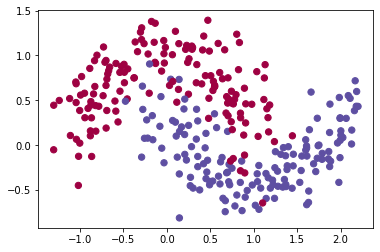

In [22]:
train_X, train_Y = load_dataset()

In [23]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    Modelo de red neuronal de 3 capas que se puede ejecutar en diferentes modos de optimización.
    
    Argumentos:
    X -- datos de entrada, de forma (2, número de ejemplos)
    Y -- verdadero vector de "etiqueta" (1 para punto azul / 0 para punto rojo), de forma (1, número de ejemplos)
    optimizador: el optimizador que se debe pasar, descenso de gradiente, impulso o adam
    layers_dims -- lista de python, que contiene el tamaño de cada capa
    learning_rate -- la tasa de aprendizaje, escalar.
    mini_batch_size: el tamaño de un mini lote
    beta -- Hiperparámetro de momento
    beta1: hiperparámetro de decaimiento exponencial para las estimaciones de gradientes anteriores
    beta2: hiperparámetro de decaimiento exponencial para las estimaciones de gradientes cuadrados anteriores
    epsilon: hiperparámetro que evita la división por cero en las actualizaciones de Adam
    num_epochs -- número de épocas
    print_cost -- True para imprimir el costo cada 1000 épocas

    Devoluciones:
    parámetros -- diccionario de python que contiene sus parámetros actualizados
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Ahora, ejecuta esta red neuronal de 3 capas con cada uno de los 3 métodos de optimización.

<a name='6-1'></a>  
### 6.1 - Mini-Batch Gradient Descent

Ejecuta el siguiente código para ver cómo se comporta el modelo con el descenso de gradiente en mini lotes.

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367


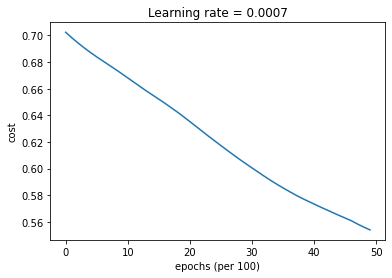

Accuracy: 0.7166666666666667


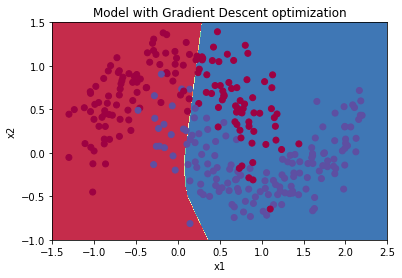

In [24]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-2'></a>  
### 6.2 - Descenso de gradiente en miniatura con impulso

A continuación, ejecute el siguiente código para ver cómo funciona el modelo con momentum. Debido a que este ejemplo es relativamente simple, las ganancias de usar momemtum son pequeñas - pero para problemas más complejos podría ver ganancias mayores.

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444


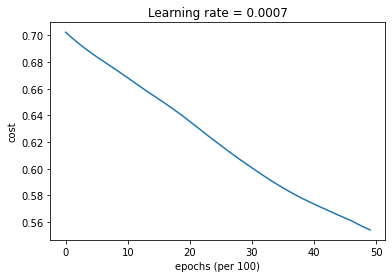

Accuracy: 0.7166666666666667


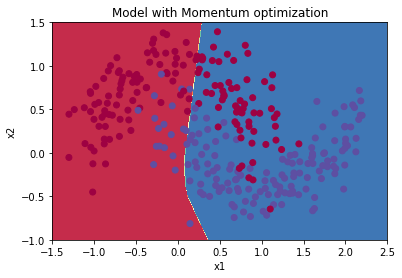

In [25]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-3'></a>  
### 6.3 - Minilotes con Adam

Por último, ejecuta el siguiente código para ver cómo funciona el modelo con Adam.

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066


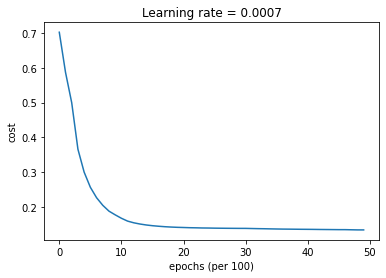

Accuracy: 0.9433333333333334


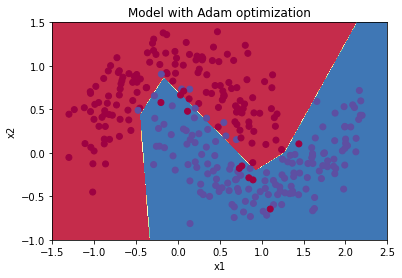

In [26]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-4'></a>  
### 6.4 - Summary

<table> 
    <tr>
        <td>
        <b>método de optimización</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
        <td>
        <b>cost shape</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >71%
        </td>
        <td>
        suave
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >71%
        </td>
        <td>
        suave
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        >94%
        </td>
        <td>
        más suave
        </td>
    </tr>
</table> 

Momentum suele ayudar, pero dada la pequeña tasa de aprendizaje y el conjunto de datos simplista, su impacto es casi insignificante.

Por otro lado, Adam supera claramente al descenso de gradiente por lotes y a Momentum. Si se ejecuta el modelo durante más épocas en este sencillo conjunto de datos, los tres métodos darán muy buenos resultados. Sin embargo, se ha visto que Adam converge mucho más rápido.

Algunas de las ventajas de Adam son

- Requiere relativamente poca memoria (aunque es mayor que el descenso por gradiente y el descenso por gradiente con impulso) 
- Suele funcionar bien incluso con poco ajuste de los hiperparámetros (excepto $\alpha$)

**Referencias**:

- Documento de Adam: https://arxiv.org/pdf/1412.6980.pdf

<a name='7'></a>  
## 7 - Decaimiento de la tasa de aprendizaje y programación

Por último, la tasa de aprendizaje es otro hiperparámetro que puede ayudarle a acelerar el aprendizaje. 

Durante la primera parte del entrenamiento, su modelo puede salirse con la suya dando grandes pasos, pero con el tiempo, el uso de un valor fijo para la tasa de aprendizaje alfa puede hacer que su modelo se quede atascado en una amplia oscilación que nunca llega a converger. Pero si redujera lentamente su tasa de aprendizaje alfa a lo largo del tiempo, podría dar pasos más pequeños y lentos que le acercaran al mínimo. Esta es la idea que subyace a la disminución de la tasa de aprendizaje. 

La disminución de la tasa de aprendizaje puede lograrse utilizando métodos adaptativos o programas de tasa de aprendizaje predefinidos. 

Ahora, aplicaremos la disminución programada de la tasa de aprendizaje a una red neuronal de 3 capas en tres modos diferentes del optimizador y veremos cómo difiere cada uno, así como el efecto de la programación en diferentes épocas. 

Este modelo es esencialmente el mismo que usaste antes, excepto que en este podrás incluir el decaimiento de la tasa de aprendizaje. Incluye dos nuevos parámetros, decay y decay_rate.

In [32]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay=None, decay_rate=1):
    """
    Modelo de red neuronal de 3 capas que puede ejecutarse en diferentes modos de optimización.
    
    Argumentos:
    X -- datos de entrada, de forma (2, número de ejemplos)
    Y -- vector "etiqueta" verdadera (1 para el punto azul / 0 para el punto rojo), de forma (1, número de ejemplos)
    layers_dims -- lista de python, que contiene el tamaño de cada capa
    learning_rate -- la tasa de aprendizaje, escalar.
    mini_batch_size -- el tamaño de un mini lote
    beta -- Hiperparámetro de impulso
    beta1 -- Hiperparámetro de decaimiento exponencial para las estimaciones de los gradientes pasados 
    beta2 -- Hiperparámetro de decaimiento exponencial para las estimaciones de gradientes pasados al cuadrado 
    epsilon -- hiperparámetro que evita la división por cero en las actualizaciones de Adam
    num_epochs -- número de épocas
    print_cost -- Verdadero para imprimir el coste cada 1000 épocas

    Devuelve:
    parameters -- diccionario python que contiene sus parámetros actualizados 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    lr_rates = []
    learning_rate0 = learning_rate   # the original learning rate
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

<a name='7-1'></a>  
### 7.1 - Decay on every iteration  

Para esta parte de la tarea, probarás uno de los programas predefinidos para el decaimiento de la tasa de aprendizaje, llamado decaimiento exponencial de la tasa de aprendizaje. Tiene esta forma matemática:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

<a name='ex-7'></a>  
### Exercise 7 - update_lr

Calcular la nueva tasa de aprendizaje utilizando el decaimiento exponencial del peso.

<details><summary>Code</summary>


```python
learning_rate = learning_rate0 / (1 + decay_rate * epoch_num)
```

In [33]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calcula la tasa de aprendizaje actualizada utilizando el decaimiento exponencial del peso.
    
    Argumentos:
    learning_rate0 -- Tasa de aprendizaje original. Escalar
    epoch_num -- Número de época. Entero
    decay_rate -- Tasa de decaimiento. Scalar

    Devuelve:
    learning_rate -- Tasa de aprendizaje actualizada. Scalar 
    """
    
    return learning_rate0 / (1 + decay_rate * epoch_num)


In [34]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

update_lr_test(update_lr)

Original learning rate:  0.5
Updated learning rate:  0.16666666666666666
All test passed


Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.661884
learning rate after epoch 1000: 0.000100
Cost after epoch 2000: 0.658620
learning rate after epoch 2000: 0.000050
Cost after epoch 3000: 0.656765
learning rate after epoch 3000: 0.000033
Cost after epoch 4000: 0.655486
learning rate after epoch 4000: 0.000025


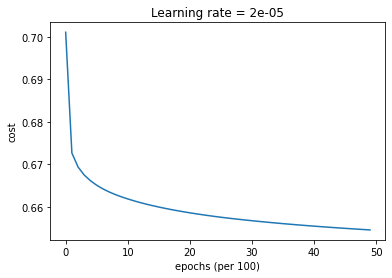

Accuracy: 0.6533333333333333


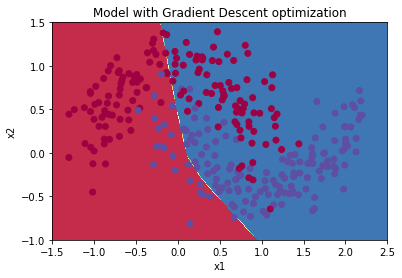

In [35]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=update_lr)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Observe que si configura el decaimiento para que se produzca en cada iteración, la tasa de aprendizaje llega a cero demasiado rápido, incluso si comienza con una tasa de aprendizaje más alta. 
<table> 
    <tr>
        <td>
        <b>Epoch Number</b>
        </td>
        <td>
        <b>Learning Rate</b>
        </td>
        <td>
        <b>Cost</b>
        </td>
    </tr>
    <tr>
        <td>
        0
        </td>
        <td>
        0.100000
        </td>
        <td>
        0.701091
        </td>
    </tr>
    <tr>
        <td>
        1000
        </td>
        <td>
        0.000100
        </td>
        <td>
        0.661884
        </td>
    </tr>
    <tr>
        <td>
        2000
        </td>
        <td>
        0.000050
        </td>
        <td>
        0.658620
        </td>
    </tr>
    <tr>
        <td>
        3000
        </td>
        <td>
        0.000033
        </td>
        <td>
        0.656765
        </td>
    </tr>
    <tr>
        <td>
        4000
        </td>
        <td>
        0.000025
        </td>
        <td>
        0.655486
        </td>
    </tr>
    <tr>
        <td>
        5000
        </td>
        <td>
        0.000020
        </td>
        <td>
        0.654514
        </td>
    </tr>
</table> 

Cuando se entrena durante unas pocas épocas esto no causa muchos problemas, pero cuando el número de épocas es grande el algoritmo de optimización dejará de actualizarse. Una solución común a este problema es decaer la tasa de aprendizaje cada pocos pasos. Esto se llama programación a intervalos fijos.

<a name='7-2'></a> 
### 7.2 - Programación a intervalos fijos

Puede evitar que la velocidad de aprendizaje llegue a cero demasiado rápido programando el decaimiento de la velocidad de aprendizaje exponencial en un intervalo de tiempo fijo, por ejemplo 1000. Puede numerar los intervalos, o dividir la época por el intervalo de tiempo, que es el tamaño de la ventana con la tasa de aprendizaje constante. 

<img src="images/lr.png" style="width:400px;height:250px;">

<a name='ex-8'></a> 
### Ejercicio 8 - schedule_lr_decay

Calcule la nueva tasa de aprendizaje utilizando el decaimiento exponencial del peso con la programación de intervalos fijos.

**Instrucciones**: Implementar la programación de la tasa de aprendizaje de manera que sólo cambie cuando el epochNum sea un múltiplo del timeInterval.

**Nota:** La fracción en el denominador utiliza la operación suelo. 

$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$

**Hint:** [numpy.floor](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)

<details><summary>Code</summary>


```python
learning_rate = learning_rate0 / (1 + decay_rate * np.floor(epoch_num / time_interval))
```

In [36]:
# GRADED FUNCTION: schedule_lr_decay

def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calcula la tasa de aprendizaje actualizada utilizando el decaimiento exponencial del peso.
    
    Argumentos:
    learning_rate0 -- Tasa de aprendizaje original. Escalar
    epoch_num -- Número de época. Entero.
    decay_rate -- Tasa de decaimiento. Scalar.
    time_interval -- Número de épocas en las que se actualiza la tasa de aprendizaje.

    Devuelve:
    learning_rate -- Tasa de aprendizaje actualizada. Escalar 
    """
    return learning_rate0 / (1 + decay_rate * np.floor(epoch_num / time_interval))

**Expected output**
```
Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846
```

<a name='7-3'></a> 
### 7.3 - Utilizar el decaimiento de la tasa de aprendizaje para cada método de optimización

A continuación, utilizará el siguiente conjunto de datos "lunas" para probar los diferentes métodos de optimización. (El conjunto de datos se llama "lunas" porque los datos de cada una de las dos clases se parecen un poco a una luna en forma de media luna). 

<a name='7-3-1'></a> 
#### 7.3.1 - Descenso de gradiente con decaimiento de la tasa de aprendizaje

Ejecute el siguiente código para ver cómo el modelo realiza el descenso de gradiente y el decaimiento del peso.

Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.127161
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.120304
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.117033
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.117512
learning rate after epoch 4000: 0.020000


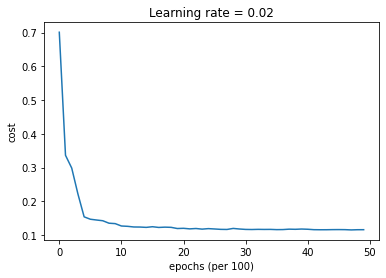

Accuracy: 0.9433333333333334


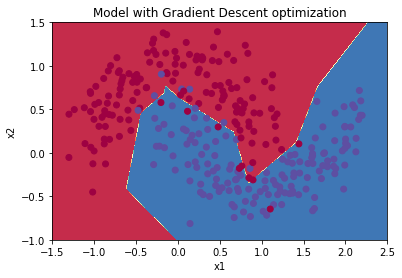

In [37]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-2'></a> 
#### 7.3.2 - Descenso de gradiente con decaimiento del momento y de la tasa de aprendizaje

Ejecute el siguiente código para ver cómo el modelo realiza el descenso de gradiente con impulso y decaimiento de peso.

Cost after epoch 0: 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.125965
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.123375
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.123218
learning rate after epoch 4000: 0.020000


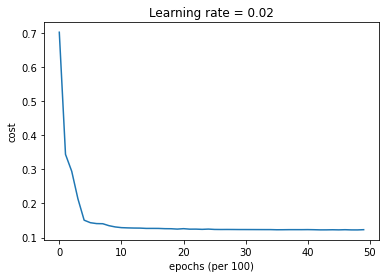

Accuracy: 0.9533333333333334


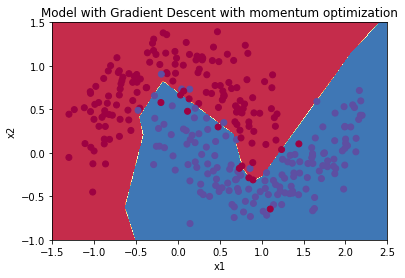

In [38]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-3'></a> 
#### 7.3.3 - Adán con decaimiento de la tasa de aprendizaje

Ejecute el siguiente código para ver cómo el modelo hace Adán y el decaimiento del peso.

Cost after epoch 0: 0.699346
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.130074
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.129826
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.129282
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.128361
learning rate after epoch 4000: 0.002000


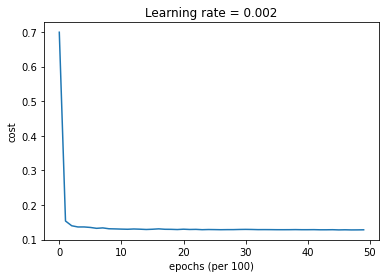

Accuracy: 0.94


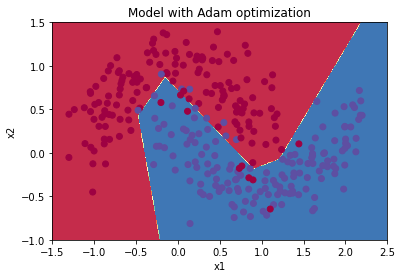

In [39]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-4'></a> 
### 7.4 - Lograr un rendimiento similar con diferentes métodos

Con Mini-batch GD o Mini-batch GD con Momentum, la precisión es significativamente inferior a la de Adam, pero cuando se añade el decaimiento de la tasa de aprendizaje, cualquiera de los dos puede lograr un rendimiento a una velocidad y una puntuación de precisión similares a las de Adam.

En el caso de Adam, observe que la curva de aprendizaje alcanza una precisión similar pero más rápida.

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >94.6%
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >95.6%
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
    </tr>
</table> 

**¡Felicidades**! Has llegado al final del cuaderno de métodos de optimización. Aquí tienes un rápido resumen de todo lo que puedes hacer ahora: 

* Aplicar tres métodos de optimización diferentes a sus modelos 
* Construir minilotes para su conjunto de entrenamiento 
* Utilizar la programación de la tasa de aprendizaje para acelerar el entrenamiento

¡Buen trabajo!